<a href="https://colab.research.google.com/github/thaiassiaht/Capacita-Brasil-C-jovem---Ci-ncia-de-Dados/blob/main/modulo-avan%C3%A7ado/Oficina_1_Modelo_de_previs%C3%A3o_de_temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1 e Passo 2

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184




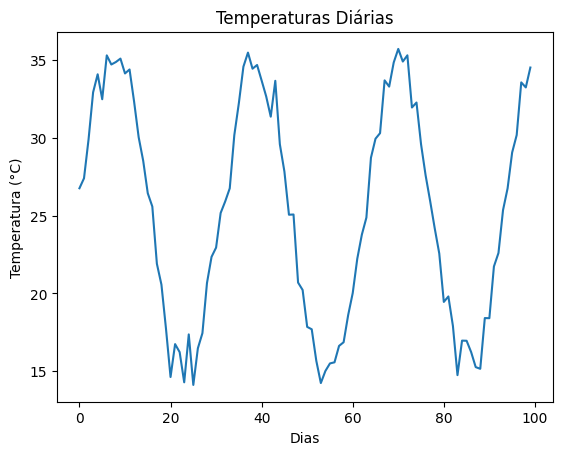

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)
df = pd.DataFrame(data, columns=['Temperatura'])


print(df.head())
print('\n')
plt.plot(df)
plt.title('Temperaturas Diárias')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.show()


 Pré-processamento dos Dados

In [ ]:
def create_sequences(data, seq_length):               #Transformando os dados em janelas deslizantes
    x = []
    y = []
    for i in range(len(data) - seq_length):           #30 - o numero de dados
      x.append(data[i:i+seq_length])                  #Entrada
      y.append(data[i+seq_length])                    #Rótulo
    return np.array(x), np.array(y)

scaler = MinMaxScaler(feature_range=(0,1))  #Dados escalonados para o intervalo entre 0 e 1 já que é bem mais fácil trabalhar com esses valores
scaled_data = scaler.fit_transform(data.reshape(-1,1))  #Trandsformando em uma coluna onde Feature é 1 (temperatura)
seq_length = 30
x, y = create_sequences(scaled_data, seq_length)
x = x.reshape((x.shape[0], x.shape[1], 1))


train_size = int(len(x) * 0.8)       #80% dos dados pra treinamento do modelo
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




 Construção da Rede LSTM e testes

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.4089 - val_loss: 0.2228
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2030 - val_loss: 0.1251
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1160 - val_loss: 0.1049
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1214 - val_loss: 0.0983
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1009 - val_loss: 0.0985
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0963 - val_loss: 0.0824
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0904 - val_loss: 0.0714
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0738 - val_loss: 0.0652
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0675 - val_loss: 0.0565
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0519 - val_loss: 0.0475
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - val_loss: 0.0360
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0270 - val_loss: 0.0195
E

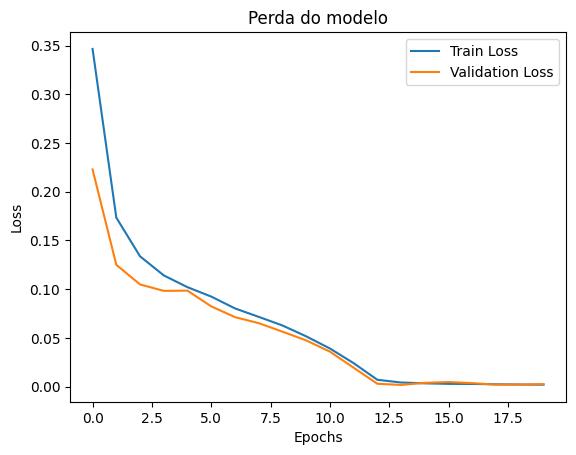

In [ ]:
model = Sequential()                                     #Camadas da redeneural
model.add(LSTM(50, input_shape=(seq_length, 1)))         #criei só com duas camadas já que o "problema" é mais simples
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=8,           #Modelo atualiza os valores que aprendeu a cada 8 amostras
    validation_data=(x_test, y_test)
)

print("\n")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perda do modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Avaliação e Previsão

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


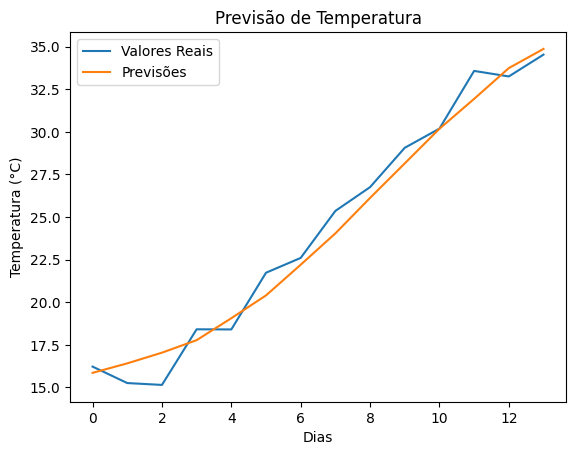

In [ ]:
y_pred = model.predict(x_test)

y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

plt.plot(y_test_original, label='Real')
plt.plot(y_pred_original, label='Previsto')
plt.title('Previsão de Temperatura')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()